In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-8.166560190274183 15.23003925344716
68.81593756574142 13.70198171382006
-44.93740412315325 -68.06215278998575
40.98681881431975 -1.430243068196262
-57.4659860918983 -162.09375693034823
0.878162596506229 161.70749660762192
3.3276603779235927 -131.90366592036938
-78.31331263646317 -19.877342424272626
9.446324086777409 -48.379395350916724
-39.903054220209945 -128.72028409882938
-18.407546182747197 11.933134488831797
29.93755371330994 -80.22289227955581
87.27648781609975 -15.058541039160161
21.64444244160542 137.30876754527702
5.451840589429224 11.339174517393928
29.284848688568076 -4.327280719120893
75.90576045901673 6.045048438791838
0.5027376012086222 -156.50135133153898
7.842002676917929 66.73316193725381
37.05501615538779 -161.6070464981974
39.73023520018518 161.30072722679756
88.99153363272808 -139.1185261087275
33.29791154276246 -91.0070263025202
-49.91635927759998 96.91568765908903
49.38424447052918 -26.86953926159046
41.64940456325533 167.53846281099203
-16.15893322666136 100.435

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

600

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | camabatela
Processing Record 2 of Set 1 | stamsund
City not found. Skipping...
Processing Record 3 of Set 1 | comodoro rivadavia
Processing Record 4 of Set 1 | calatayud
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | buala
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | cayenne
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | opuwo
Processing Record 12 of Set 1 | palm coast
Processing Record 13 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 1 | naze
Processing Record 15 of Set 1 | foumban
Processing Record 16 of Set 1 | mrirt
City not found. Skipping...
Processing Record 17 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 18 of Set 1 | faanui
Processing Record 19 of Set 1 | kulhudhuffushi
Processing Record 20 of Set 1 | kapaa
Processing 

Processing Record 36 of Set 4 | padang
Processing Record 37 of Set 4 | geraldton
Processing Record 38 of Set 4 | san rafael
Processing Record 39 of Set 4 | kihei
Processing Record 40 of Set 4 | corowa
Processing Record 41 of Set 4 | praia
Processing Record 42 of Set 4 | komsomolskiy
Processing Record 43 of Set 4 | constitucion
Processing Record 44 of Set 4 | souillac
Processing Record 45 of Set 4 | meulaboh
Processing Record 46 of Set 4 | dharchula
Processing Record 47 of Set 4 | malmesbury
Processing Record 48 of Set 4 | san martin
Processing Record 49 of Set 4 | doha
Processing Record 50 of Set 4 | bocanda
Processing Record 1 of Set 5 | oshkosh
Processing Record 2 of Set 5 | beringovskiy
Processing Record 3 of Set 5 | sao joao da barra
Processing Record 4 of Set 5 | fuerte olimpo
Processing Record 5 of Set 5 | klaksvik
Processing Record 6 of Set 5 | upernavik
Processing Record 7 of Set 5 | eirunepe
Processing Record 8 of Set 5 | aklavik
Processing Record 9 of Set 5 | grand river sout

Processing Record 30 of Set 8 | koumac
Processing Record 31 of Set 8 | caravelas
Processing Record 32 of Set 8 | chardara
Processing Record 33 of Set 8 | bur gabo
City not found. Skipping...
Processing Record 34 of Set 8 | elko
Processing Record 35 of Set 8 | mogocha
Processing Record 36 of Set 8 | penzance
Processing Record 37 of Set 8 | micheweni
Processing Record 38 of Set 8 | sechura
Processing Record 39 of Set 8 | yumen
Processing Record 40 of Set 8 | eyl
Processing Record 41 of Set 8 | samusu
City not found. Skipping...
Processing Record 42 of Set 8 | karkaralinsk
City not found. Skipping...
Processing Record 43 of Set 8 | key west
Processing Record 44 of Set 8 | san quintin
Processing Record 45 of Set 8 | montepuez
Processing Record 46 of Set 8 | cidreira
Processing Record 47 of Set 8 | marsaxlokk
Processing Record 48 of Set 8 | marzuq
Processing Record 49 of Set 8 | bambous virieux
Processing Record 50 of Set 8 | novoagansk
Processing Record 1 of Set 9 | teguldet
Processing Rec

Processing Record 15 of Set 12 | itarema
Processing Record 16 of Set 12 | korla
Processing Record 17 of Set 12 | huangzhou
Processing Record 18 of Set 12 | montrose
Processing Record 19 of Set 12 | kropotkin
Processing Record 20 of Set 12 | kupang
Processing Record 21 of Set 12 | carballo
Processing Record 22 of Set 12 | szczecinek
Processing Record 23 of Set 12 | mount gambier
Processing Record 24 of Set 12 | waipawa
Processing Record 25 of Set 12 | nantucket
Processing Record 26 of Set 12 | saint anthony
Processing Record 27 of Set 12 | karasjok
Processing Record 28 of Set 12 | sur
Processing Record 29 of Set 12 | san luis
Processing Record 30 of Set 12 | zherdevka
Processing Record 31 of Set 12 | zhangjiakou
Processing Record 32 of Set 12 | redmond
Processing Record 33 of Set 12 | chifeng
Processing Record 34 of Set 12 | tsienyane
City not found. Skipping...
Processing Record 35 of Set 12 | acobamba
Processing Record 36 of Set 12 | yumaguzino
Processing Record 37 of Set 12 | callagu

In [10]:
len(city_data)

550

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Camabatela,-8.1881,15.3750,73.72,52,91,1.03,AO,2022-09-12 18:26:38
1,Comodoro Rivadavia,-45.8667,-67.5000,49.86,66,0,12.66,AR,2022-09-12 18:26:39
2,Calatayud,41.3535,-1.6432,77.09,51,98,5.57,ES,2022-09-12 18:26:39
3,Avarua,-21.2078,-159.7750,75.25,78,75,10.36,CK,2022-09-12 18:26:39
4,Buala,-8.1450,159.5921,78.37,80,56,5.01,SB,2022-09-12 18:22:31
5,Atuona,-9.8000,-139.0333,76.28,78,50,20.24,PF,2022-09-12 18:25:45
6,Ushuaia,-54.8000,-68.3000,46.06,49,40,3.44,AR,2022-09-12 18:25:39
7,Cayenne,4.9333,-52.3333,87.84,58,20,10.36,GF,2022-09-12 18:26:39
8,Rikitea,-23.1203,-134.9692,72.63,70,88,4.52,PF,2022-09-12 18:26:40
9,Opuwo,-18.0607,13.8400,76.69,16,6,6.17,NA,2022-09-12 18:21:45


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [13]:
city_data_df = city_data_df[new_column_order]

In [14]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Camabatela,AO,2022-09-12 18:26:38,-8.1881,15.3750,73.72,52,91,1.03
1,Comodoro Rivadavia,AR,2022-09-12 18:26:39,-45.8667,-67.5000,49.86,66,0,12.66
2,Calatayud,ES,2022-09-12 18:26:39,41.3535,-1.6432,77.09,51,98,5.57
3,Avarua,CK,2022-09-12 18:26:39,-21.2078,-159.7750,75.25,78,75,10.36
4,Buala,SB,2022-09-12 18:22:31,-8.1450,159.5921,78.37,80,56,5.01
...,...,...,...,...,...,...,...,...,...
545,Kangaatsiaq,GL,2022-09-12 18:39:46,68.3065,-53.4641,41.86,93,100,23.76
546,Jumla,NP,2022-09-12 18:39:46,29.2747,82.1838,58.95,94,99,1.52
547,Amuntai,ID,2022-09-12 18:39:47,-2.4177,115.2494,71.71,98,40,1.54
548,Chapais,CA,2022-09-12 18:39:48,49.7834,-74.8492,60.58,53,99,3.80


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

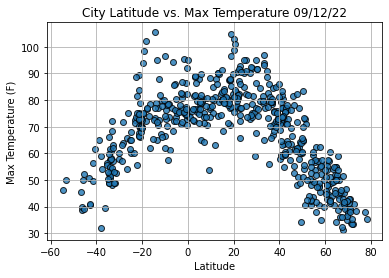

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

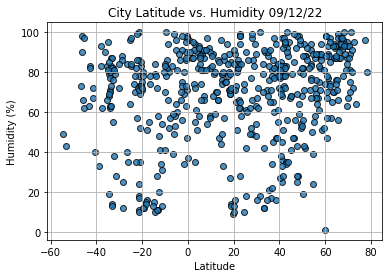

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

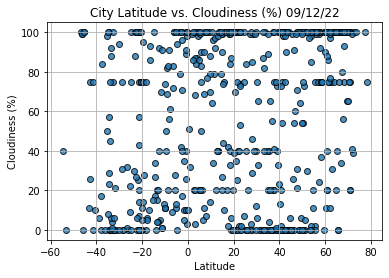

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

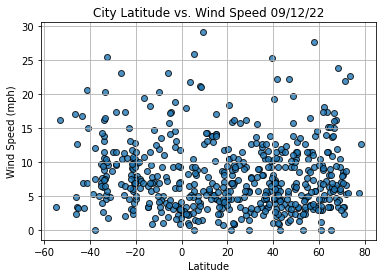

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()